In [1]:
import numpy as np
import matplotlib.pyplot as plt
from IPython import display
from ipywidgets import IntProgress

from code.bp import *
from code.lattice import *

%load_ext autoreload
%autoreload 2

# Inference: Belief Propagation

In [2]:
h, w = 256, 256

J = 0.5
B = 0.01 * gaussian_B(h, w)
beta = 10

In [3]:
unary_potentials = np.exp(beta * np.expand_dims(B, axis=-1) * np.tile(np.array([-1, 1]), (h, w, 1)))
pairwise_potential = np.exp(beta * J * np.outer([-1, 1], [-1, 1]))

unary_messages = np.ones((h, w, 4, 2)) # U, D, L, R
col_pairwise_messages = np.ones((h-1, w, 2, 2)) # U, D
row_pairwise_messages = np.ones((h, w-1, 2, 2)) # L, R

In [4]:
timesteps = [
    compute_beliefs(unary_potentials, pairwise_potential, unary_messages, col_pairwise_messages, row_pairwise_messages)
]

delta = 1
while delta > 1e-3:
    
    # Old messages
    unary_copy = unary_messages.copy()
    col_pairwise_copy = col_pairwise_messages.copy()
    row_pairwise_copy = row_pairwise_messages.copy()
    
    # Step
    step(h, w, unary_potentials, pairwise_potential, unary_messages, col_pairwise_messages, row_pairwise_messages)
    
    # Compute message differences
    d_unary = np.max(np.abs(unary_copy - unary_messages))
    d_col_pairwise = np.max(np.abs(col_pairwise_copy - col_pairwise_messages))
    d_row_pairwise = np.max(np.abs(row_pairwise_copy - row_pairwise_messages))
    
    delta = max(d_unary, d_col_pairwise, d_row_pairwise)
    print('.', end='')
    
    # Log beliefs
    timesteps.append(
        compute_beliefs(unary_potentials, pairwise_potential, unary_messages, col_pairwise_messages, row_pairwise_messages)
    )


...................................

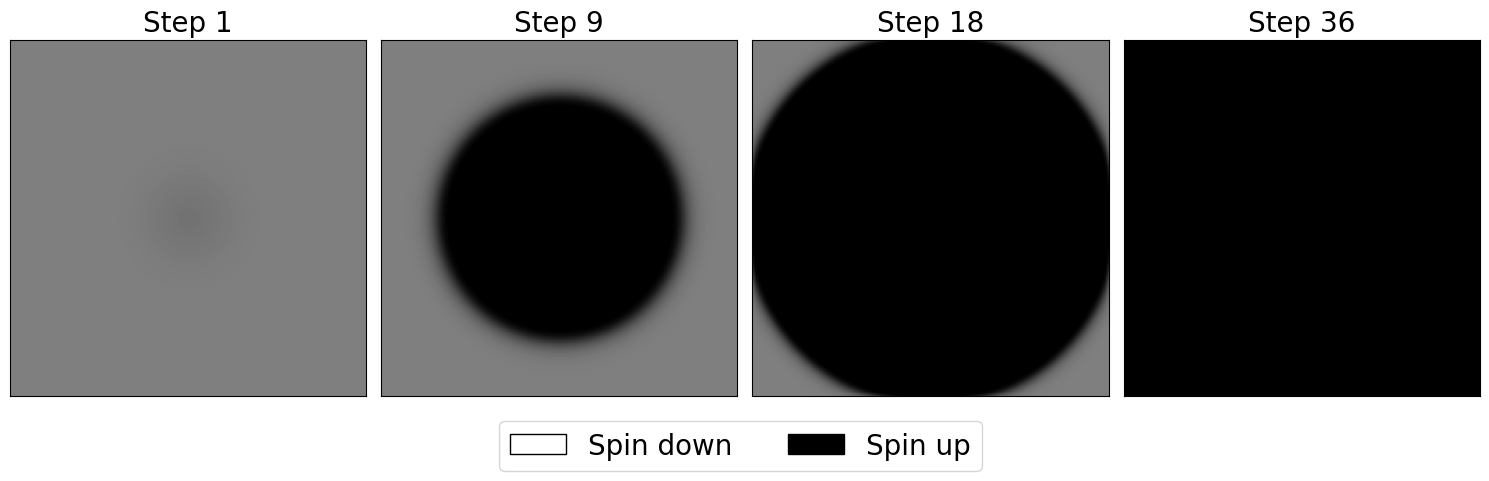

In [8]:
fig, axs = plt.subplots(1, 4, figsize=(15, 5))

steps = (0, 8, 17, 35)

for i, ax in enumerate(axs):
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_title(f'Step {steps[i] + 1}', fontsize=20)
    ax.imshow(timesteps[steps[i]][0][:, :, 1], 'binary', vmin=0, vmax=1)

plt.tight_layout()

labels = [
    Patch(facecolor='white', edgecolor='black', label='Spin down'),
    Patch(facecolor='black', edgecolor='black', label='Spin up')
]
axs[len(axs)//2].legend(handles=labels, fancybox=True, loc='lower left', bbox_to_anchor=(-0.75, -0.25), ncol=2, fontsize=20)

plt.savefig('./graphics/report_bp_gaussian.png')

In [ ]:
render_timesteps(timesteps, 16, 32, 'graphics/' + fprefix + '.mp4')